<a href="https://colab.research.google.com/github/Johann-DS7/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS7_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [1]:
# Why?: To make sure we have the current version os seaborn

import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
# Why?: import matplot library for plotting, short named as plt
#       import numpy for scientific computing in python, short as np
#       import pandas for dataframe manupulations, short as pd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
# Why?: income, lifespan, population, entities and concepts are imported data via pandas. They are each assigned a variable. 
#       pd.read_csv = pd(short for pandas), reads a csv from link in this case

income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')



In [4]:
# Why?: .shape is a pandas function that returns a tuple of its(dataframe) dimensionality. (Rows, Columns)

income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [5]:
# Why?: .head is a pandas function that returns (n) rows. Defaults to five. 

income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [6]:
lifespan.head()


,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [7]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [8]:
# Why?:  .options = set options directly as attributes
#        .display = what we want to see
#        .max_columns = limit the number of columns

pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [9]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


#Merge data

In [10]:
# Why?: prints both dimentions, else just the last code will display. 

print(income.shape)
print(lifespan.shape)

(46513, 3)
(44370, 3)


In [11]:
# Why?: create a new variable df, this is our new dataframe
#      .merge = join(merge) two or more dataframes into a new dataframe
#      must include parameters, in this case, income and lifespan
#      inner merge by default


df = pd.merge(income, lifespan, on=['geo', 'time'], how = 'inner')

print(df.shape)
df.head()

(40437, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [12]:
# Why?: Continue to merge dataframes, this time including population.
#       overides previous variable dataframe

df = pd.merge(df, population)
print(df.shape)
df.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [13]:
# Why?: Calling on the entities dataframe and 'world_6region' columns specifically
#       .value_counts() = returns a count of unque values in specified column

entities['world_6region'].value_counts()

europe_central_asia         77
sub_saharan_africa          53
america                     53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [14]:
entities['world_4region'].value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [15]:
# Why?: declared new variable of columbs we want versus naming each column we don't want
#       overiding entities variable with only the columbs we have. Entities variable is calling on Entities df. 
#       calling .head() to verify this change

entity_columns_to_keep = ['country', 'name', 'world_4region', 'world_6region']

entities = entities[entity_columns_to_keep]

print(entities.shape)
entities.head()

(273, 4)


,country,name,world_4region,world_6region
0,abkh,Abkhazia,europe,europe_central_asia
1,abw,Aruba,americas,america
2,afg,Afghanistan,asia,south_asia
3,ago,Angola,africa,sub_saharan_africa
4,aia,Anguilla,americas,america


In [16]:
# Why?: naming new variable 'merged'. 
#.      Joining df and entities into variable 'merged'
#.      calling .head() to verify

merged = pd.merge(df, entities, left_on='geo', right_on='country')

print(merged.shape)
merged.head()


                

(40437, 9)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [17]:
# Interesting bug? or am I missing something. I havent called on the .drop for 'geo'


merged = merged.drop('geo', axis='columns')

print(merged.shape)
# merged.head()

(40437, 8)


In [18]:
# Why?: Renaming columns

merged = merged.rename(columns = {
    'country': 'country_code',
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': '6region',
    'world_4region': '4region'
})

merged.head()
print(merged.shape)
merged.head()

(40437, 8)


,year,income,lifespan,population,country_code,country,4region,6region
0,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


#Explore data

In [19]:
# Why?: Returns a Series with the data type of each column

merged.dtypes

year              int64
income            int64
lifespan        float64
population        int64
country_code     object
country          object
4region          object
6region          object
dtype: object

In [20]:
# Why?: Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

merged.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [21]:
# Why?: Same as about, this time omiting 'number'

merged.describe(exclude='number')


,country_code,country,4region,6region
count,40437,40437,40437,40437
unique,187,187,4,6
top,kor,Austria,africa,europe_central_asia
freq,219,219,11826,10778


In [22]:
# Why?: Returns unique values of Series object. In this case of 'country'

merged.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [23]:
# Why?: Named a new variable 'usa'. Returns 'United States' from country coloumn only 

usa = merged[merged.country == 'United States']
usa.head()

,year,income,lifespan,population,country_code,country,4region,6region
38028,1800,2127,39.41,6801854,usa,United States,americas,america
38029,1801,2167,39.41,6933517,usa,United States,americas,america
38030,1802,2202,39.41,7067728,usa,United States,americas,america
38031,1803,2166,39.41,7204538,usa,United States,americas,america
38032,1804,2165,39.41,7343995,usa,United States,americas,america


In [24]:
# Why?: .isin = checks whether each element in the DataFrame is contained in values. values = 1818, 1918, 2018 years

usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country_code,country,4region,6region
38046,1818,2258,39.41,9879049,usa,United States,americas,america
38146,1918,9371,47.18,106721812,usa,United States,americas,america
38246,2018,54898,79.14,326766748,usa,United States,americas,america


In [25]:
china = merged[merged.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country_code,country,4region,6region
6854,1818,985,32.00,374161494,chn,China,asia,east_asia_pacific
6954,1918,989,22.13,462444535,chn,China,asia,east_asia_pacific
7054,2018,16018,76.92,1415045928,chn,China,asia,east_asia_pacific


# Creating a story:

How did World War II affect income and population at the start of the War and towards the end of the war: 1939 – 1945

There are manys ways to go about this. We can have the allies or the axis only counties, or we can just have the whole world just to see what happens. Theres a lot of confounding variables with this question. 

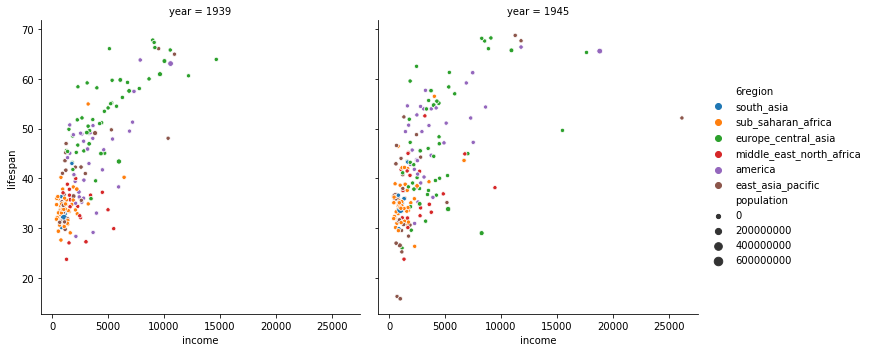

In [29]:
years = [1939, 1945]

war = merged[merged.year.isin(years)]

fig = sns.relplot(x='income', y='lifespan', hue='6region', size='population', col='year', data=war)

plt.show()

In [0]:
# lets do some exploratory to see who is who in both 1939 and 1945
# However I can already see that America is already on top in 1945



# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO